In [1]:
import os, sys, json
src_path = os.path.abspath(os.path.join(".."))
if src_path not in sys.path:
    sys.path.append(src_path)

import torch
from torch import nn
from torch.autograd import Variable
import yaml
from yaml import CLoader as Loader

import numpy as np

from PIL import Image
from matplotlib import pyplot as plt

from src.config import CaptionConfig
from src.data_loader import CaptionDataManager

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [20]:
config_file = os.path.join(src_path, "src", "config.yml")
print(config_file)
dataset = CaptionDataManager(config_file, n_sample=50)

/Users/nsimsiri/Documents/code/ml/nlp/cap/src/config.yml
loading annotations into memory...
Done (t=0.34s)
creating index...


100%|██████████| 50/50 [00:00<00:00, 6762.17it/s]

index created!
loaded - val captions








305021
{'image_id': 368291, 'id': 305021, 'caption': 'A blue plate of food on a table.', 'tokens': ['A', 'blue', 'plate', 'of', 'food', 'on', 'a', 'table', '.'], 'encoding': [2, 11, 10, 8, 9, 5, 4, 7, 6, 12, 3]}

{'license': 4, 'file_name': 'COCO_val2014_000000368291.jpg', 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000368291.jpg', 'height': 375, 'width': 500, 'date_captured': '2013-11-15 18:29:47', 'flickr_url': 'http://farm3.staticflickr.com/2137/2461579997_3ff845fe26_z.jpg', 'id': 368291}



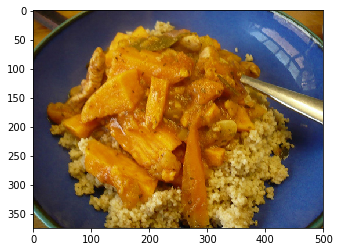

In [30]:
# print(dataset.data)
for annId in dataset.getAnnIds():
    print(annId)
    ann_i = dataset.load_ann(annId)
    print(ann_i)
    print()
    image_i = dataset.load_image_object(ann_i['image_id'])
    
    print(image_i)
    
    print()
    
    image = dataset.load_image(ann_i['image_id'])
    
    plt.imshow(image)
    break

In [67]:
train_loader = dataset.build_dataloader('train', batch_size=5)
for x in train_loader:
    annIds, imgs, captions, caption_lens = x
    print(annIds)
    print(captions,'\n')
    print(caption_lens)
    
    break

[168386, 16858, 459583, 324787, 301133]
[[2, 11, 77, 79, 81, 82, 83, 80, 78, 3], [2, 11, 72, 74, 73, 71, 7, 69, 70, 12, 3], [2, 11, 77, 28, 7, 76, 4, 60, 9, 7, 75, 3], [2, 11, 65, 43, 64, 68, 28, 67, 33, 4, 7, 66, 12, 3], [2, 11, 10, 56, 59, 61, 55, 4, 18, 63, 9, 7, 57, 60, 54, 4, 7, 58, 62, 12, 3]] 

[10, 11, 12, 14, 21]


In [51]:
a = [[0,1],[0,3], [1,2]]
print(sorted(a, key=lambda x: x[1]))

[[0, 1], [1, 2], [0, 3]]


In [50]:
help(sorted)

Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.
    
    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.



In [63]:
a = torch.randn((3,5,5))
b = torch.randn((3,5,5))
torch.cat([a,b]).size()

torch.Size([6, 5, 5])